### Your task:

- Read data from **train.csv**  
Form new dataset from rows (houses) with high OverallQual (8,9,10) and following columns:  
'LotArea', 'YearBuilt', 'LotShape', 'HouseStyle', 'OverallCond', 'Heating', 'KitchenQual',   
'Functional', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'GarageQual','GarageFinish','PoolArea',  
 'SalePrice'


1) Find averages (mean, mode, median), standard deviation, skew and kurtosis for 3 numerical columns (your choice);  
comment the results  
2) Draw histograms, boxplots for data from chosen columns   
3) Provide _**log**_ transformation for columns with skewness > 1 and plot histograms for scaled data;  
compare histograms before and after transformation  
4) Find mode for all nominal columns (create a table); plot bar charts for any two of them  
5) Create new column which groups LotArea into 3 bins: Small, Medium, Large (your choise for thresholds);  
draw scatter plot to show dependency between SalePrice, YearRemodAdd colored by Small/Medium/Large groups  
6) Draw graph to show changes of average SalePrice grouped by YearBuilt  
7) Draw box-plots of SalePrice grouped by OverallCond score  

- Provide in-depth analysis of the dataset (find as many insights in data as possible ;))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading train.csv
data = pd.read_csv("train.csv")

In [4]:
# forming new dataset with specific features
data_set = pd.DataFrame(data[data.OverallQual >= 8], columns=['LotArea', 'OverallQual', 
'YearBuilt', 'LotShape', 'HouseStyle', 'OverallCond', 'Heating', 'KitchenQual',
'Functional', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'GarageQual','GarageFinish',
'PoolArea', 'SalePrice'])
data_set

,LotArea,OverallQual,YearBuilt,LotShape,HouseStyle,OverallCond,Heating,KitchenQual,Functional,YearRemodAdd,GarageCars,GarageArea,GarageQual,GarageFinish,PoolArea,SalePrice
4,14260,8,2000,IR1,2Story,5,GasA,Gd,Typ,2000,3,836,TA,RFn,0,250000
6,10084,8,2004,Reg,1Story,5,GasA,Gd,Typ,2005,2,636,TA,RFn,0,307000
11,11924,9,2005,IR1,2Story,5,GasA,Ex,Typ,2006,3,736,TA,Fin,0,345000
20,14215,8,2005,IR1,2Story,5,GasA,Gd,Typ,2006,3,853,TA,RFn,0,325300
22,9742,8,2002,Reg,1Story,5,GasA,Gd,Typ,2002,2,534,TA,RFn,0,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,16545,8,1998,IR1,2Story,5,GasA,Gd,Typ,1998,3,1069,TA,Fin,0,340000
1437,12444,8,2008,Reg,1Story,5,GasA,Ex,Typ,2008,3,774,TA,Fin,0,394617
1442,11003,10,2008,Reg,2Story,5,GasA,Ex,Typ,2008,3,812,TA,Fin,0,310000
1447,10000,8,1995,Reg,2Story,5,GasA,Gd,Typ,1996,2,556,TA,RFn,0,240000


In [7]:
analyze_3 = data_set[["LotArea", "YearBuilt", "SalePrice"]]
data_set.LotArea.max()

63887

In [37]:
# mean value 
analyze_3.mean()

LotArea       12228.576419
YearBuilt      1997.991266
SalePrice    305035.899563
dtype: float64

In [38]:
# median
analyze_3.median()

LotArea       11362.0
YearBuilt      2004.0
SalePrice    285000.0
dtype: float64

In [39]:
# mode
analyze_3.mode()

,LotArea,YearBuilt,SalePrice
0,9000.0,2006.0,275000
1,NaN,NaN,290000
2,NaN,NaN,315000
3,NaN,NaN,325000


### Mean:
In the average all houses were built in the 1997 (+-1y) year with LotArea ~12228.5 sq. feet
and sale price ~305036 (Uah/Usd?).
### Median:
We see that median house is the house built in 2004 with lot area of 11362.0 sq. feet and sale price of 285000.0 dollars.
### Mode:
Most of the houses were built in 2006. And their lot area is 9000 sq.f.
Interestingly that this dataset has four mode values for SalePrice column. And this is correct!


In [40]:
# standard deviation (the difference from the mean value)
analyze_3.std()

LotArea       7049.946574
YearBuilt       20.427448
SalePrice    94509.488446
dtype: float64

In [126]:
# skewness, or in other words assymetry (positive - skewness tail to the right
# and negative - tail to the left)
analyze_3.skew()
analyze_3.LotArea.skew()

4.194497264920147

In [42]:
# kurtosis - the highest (positive) or the lowest (negative) slope (normal distribution = 0)
# the more the number is, the better results are 
analyze_3.kurt()

LotArea      23.548107
YearBuilt    18.344215
SalePrice     4.383314
dtype: float64

### Visualizations

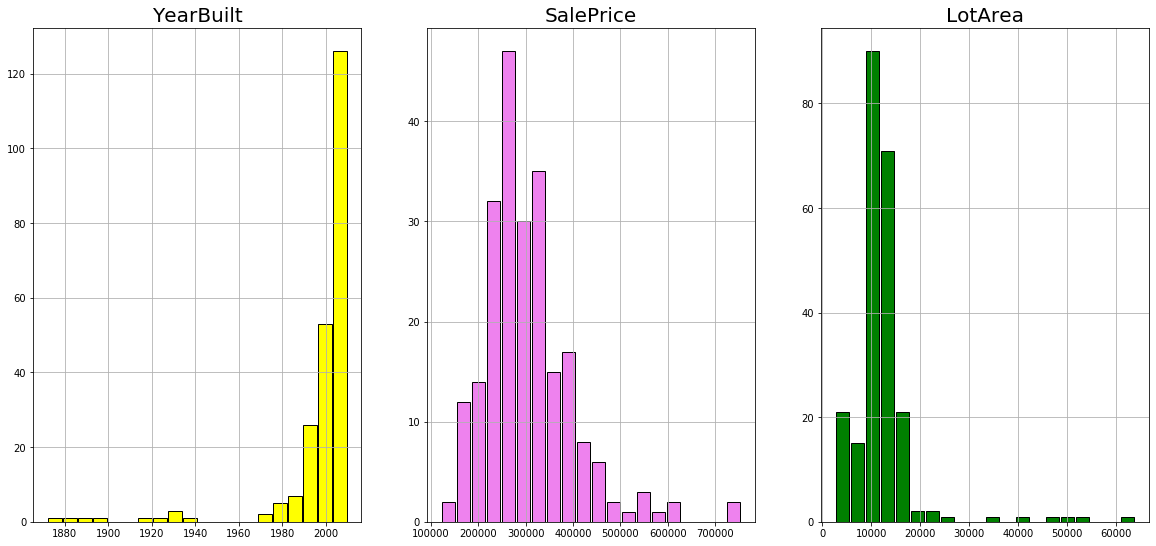

In [85]:
# histogram
figure = plt.figure(figsize=(20, 20))
ax1 = figure.add_subplot(231)
ax1.hist(analyze["YearBuilt"], bins=20, rwidth=0.90, color="yellow", edgecolor="black")
ax1.set_title('YearBuilt', fontsize=20)
ax2 = figure.add_subplot(232)
ax2.hist(analyze["SalePrice"], bins=20, rwidth=0.90, color="violet", edgecolor="black")
ax2.set_title('SalePrice', fontsize=20)
ax3 = figure.add_subplot(233)
ax3.hist(analyze["LotArea"], bins=20, rwidth=0.90, color="green", edgecolor="black")
ax3.set_title('LotArea', fontsize=20)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

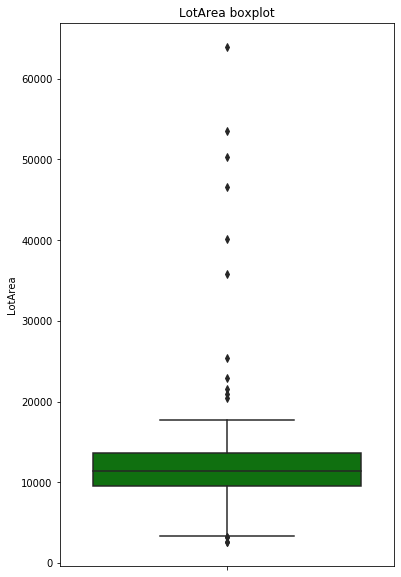

In [111]:
# boxplots
figure = plt.figure(figsize=(6, 10))
ax = sns.boxplot(analyze_3.LotArea, orient="vertical", color='g')
ax.set_title("LotArea boxplot")
plt.show()

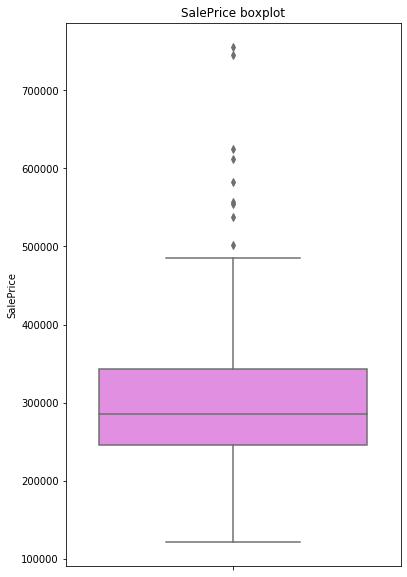

In [112]:
figure = plt.figure(figsize=(6, 10))
ax = sns.boxplot(analyze_3.SalePrice, orient="vertical", color='violet')
ax.set_title("SalePrice boxplot")
plt.show()

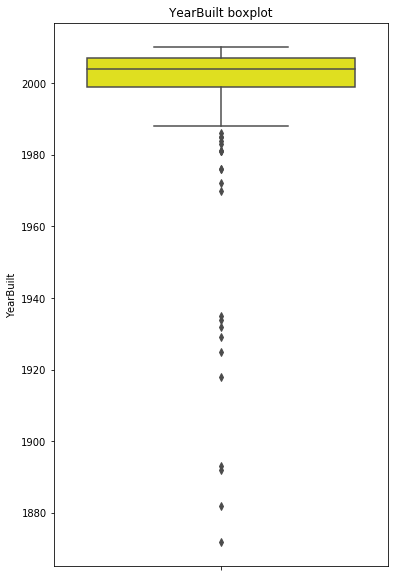

In [113]:
figure = plt.figure(figsize=(6, 10))
ax = sns.boxplot(analyze_3.YearBuilt, orient="vertical", color='yellow')
ax.set_title("YearBuilt boxplot")
plt.show()

### Log transformation

In [137]:
import numpy as np
# selecting the columns with skew > 1
data_set2 = analyze_3[[i for i in analyze_3.columns if analyze_3[i].skew() > 1]]
data_set2

,LotArea,SalePrice
4,14260,250000
6,10084,307000
11,11924,345000
20,14215,325300
22,9742,230000
...,...,...
1417,16545,340000
1437,12444,394617
1442,11003,310000
1447,10000,240000


In [141]:
data_set_log = data_set2.apply(np.log)
data_set_log

,LotArea,SalePrice
4,9.565214,12.429216
6,9.218705,12.634603
11,9.386308,12.751300
20,9.562053,12.692503
22,9.184202,12.345835
...,...,...
1417,9.713839,12.736701
1437,9.428994,12.885671
1442,9.305923,12.644328
1447,9.210340,12.388394


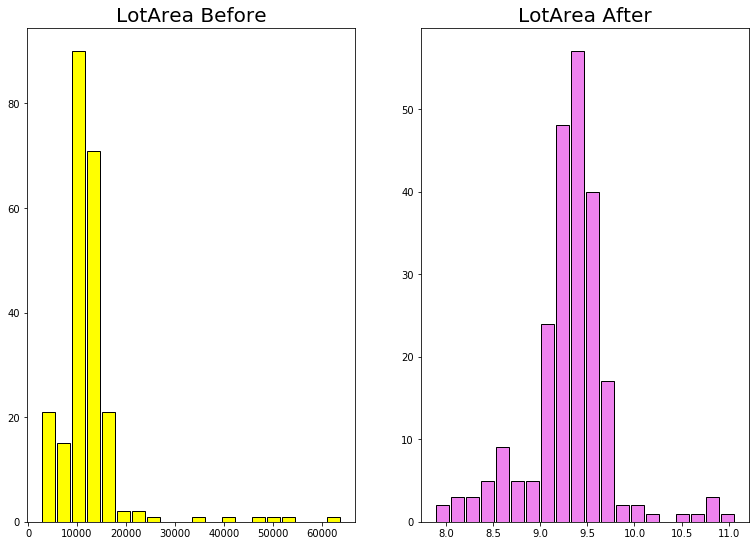

In [145]:
figure = plt.figure(figsize=(20, 20))
ax1 = figure.add_subplot(231)
ax1.hist(data_set2["LotArea"], bins=20, rwidth=0.90, color="yellow", edgecolor="black")
ax1.set_title('LotArea Before', fontsize=20)
ax2 = figure.add_subplot(232)
ax2.hist(data_set_log["LotArea"], bins=20, rwidth=0.90, color="violet", edgecolor="black")
ax2.set_title('LotArea After', fontsize=20)
plt.show()

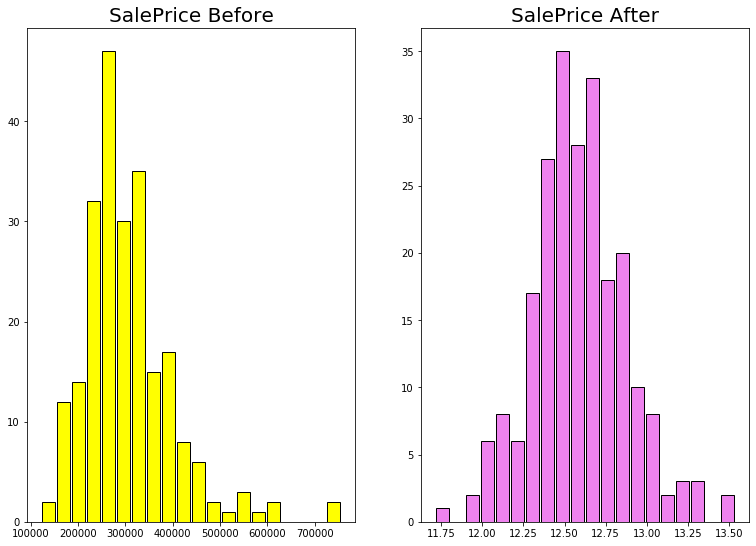

In [146]:
figure = plt.figure(figsize=(20, 20))
ax1 = figure.add_subplot(231)
ax1.hist(data_set2["SalePrice"], bins=20, rwidth=0.90, color="yellow", edgecolor="black")
ax1.set_title('SalePrice Before', fontsize=20)
ax2 = figure.add_subplot(232)
ax2.hist(data_set_log["SalePrice"], bins=20, rwidth=0.90, color="violet", edgecolor="black")
ax2.set_title('SalePrice After', fontsize=20)
plt.show()

In [4]:
# selecting only string type - nominal columns
df = data_set.select_dtypes(include=["object"])
df

,LotShape,HouseStyle,Heating,KitchenQual,Functional,GarageQual,GarageFinish
4,IR1,2Story,GasA,Gd,Typ,TA,RFn
6,Reg,1Story,GasA,Gd,Typ,TA,RFn
11,IR1,2Story,GasA,Ex,Typ,TA,Fin
20,IR1,2Story,GasA,Gd,Typ,TA,RFn
22,Reg,1Story,GasA,Gd,Typ,TA,RFn
...,...,...,...,...,...,...,...
1417,IR1,2Story,GasA,Gd,Typ,TA,Fin
1437,Reg,1Story,GasA,Ex,Typ,TA,Fin
1442,Reg,2Story,GasA,Ex,Typ,TA,Fin
1447,Reg,2Story,GasA,Gd,Typ,TA,RFn


In [5]:
mode_df = df.mode()
mode_df

,LotShape,HouseStyle,Heating,KitchenQual,Functional,GarageQual,GarageFinish
0,Reg,1Story,GasA,Gd,Typ,TA,Fin


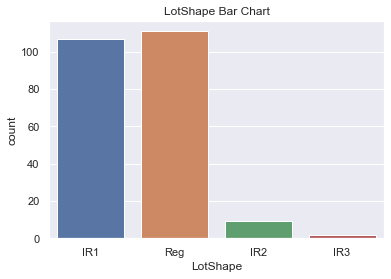

In [168]:
# bar plot for LotShape feature
sns.set()
sns.countplot(x='LotShape', data=df)
plt.title('LotShape Bar Chart')
plt.show()

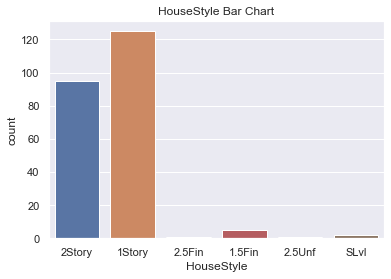

In [169]:
# bar plot for HouseStyle
sns.set()
sns.countplot(x='HouseStyle', data=df)
plt.title("HouseStyle Bar Chart")
plt.show()

In [8]:
data_set["LotAreaClass"] = data_set.apply(lambda row: "Small" if ((row.LotArea>=2645) & (row.LotArea <= 15000))
                                          else ("Medium" if ((row.LotArea>15000) & (row.LotArea <= 35000))
                                          else "Large"), axis=1) 

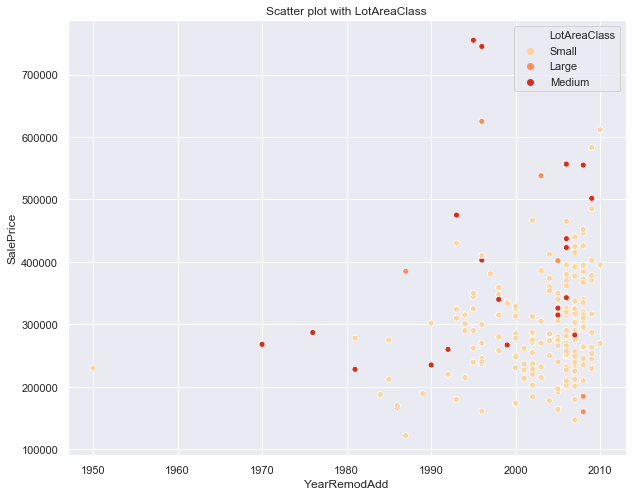

In [15]:
sns.set()
figure = plt.figure(figsize=(10,8))
ax = sns.scatterplot('YearRemodAdd', 'SalePrice', hue='LotAreaClass', 
                      data=data_set, palette='OrRd',  legend='full')
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.title("Scatter plot with LotAreaClass")
plt.show()

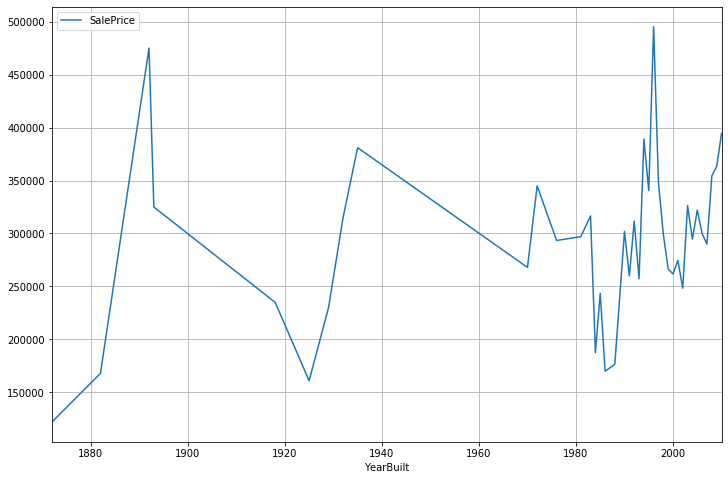

In [26]:
df = data_set[["SalePrice", "YearBuilt"]].groupby("YearBuilt").mean()
df.plot(figsize=(12, 8))
plt.grid()
#plt.show()

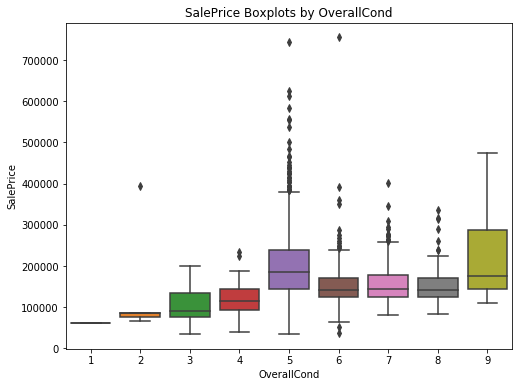

In [51]:
figure = plt.figure(figsize=(8,6))
ax = sns.boxplot(x='OverallCond', y="SalePrice", data=data[['OverallCond', 'SalePrice']])
plt.title('SalePrice Boxplots by OverallCond')
plt.show()
